In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [8]:
df = load_digits()
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
df.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

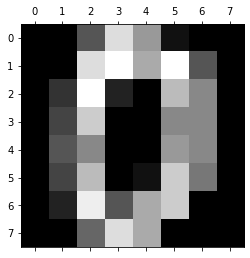

In [14]:
plt.gray()
plt.matshow(df.images[0])

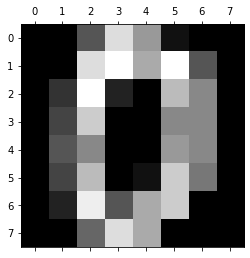

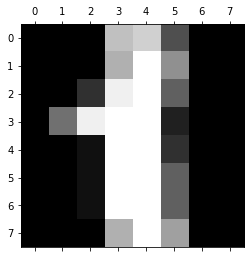

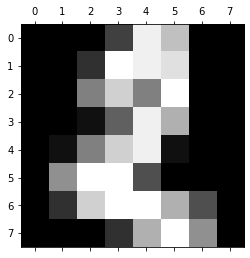

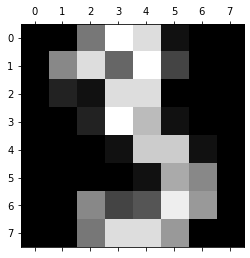

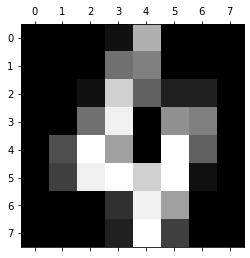

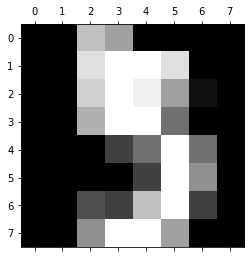

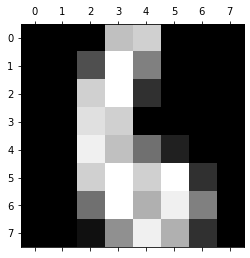

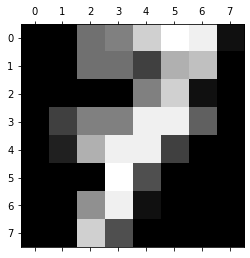

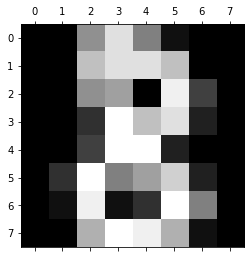

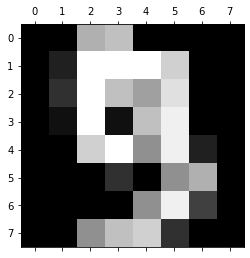

In [19]:
for i in range(10):
    plt.matshow(df.images[i])

In [20]:
df.target[0:5]

array([0, 1, 2, 3, 4])

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.2)

In [25]:
len(x_train)

1437

In [26]:
len(x_test)

360

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [29]:
clf.fit(x_train, y_train)

c:\users\91863\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
clf.score(x_test, y_test)

0.9611111111111111

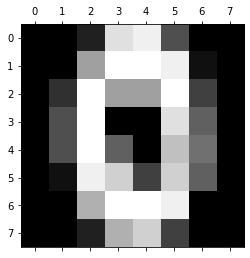

In [36]:
plt.matshow(df.images[55])

In [37]:
df.target[55]

0

In [38]:
clf.predict([df.data[55]])

array([0])

In [39]:
clf.predict(df.data[0:5])

array([0, 1, 2, 3, 4])

In [40]:
y_predict = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[26,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 25,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

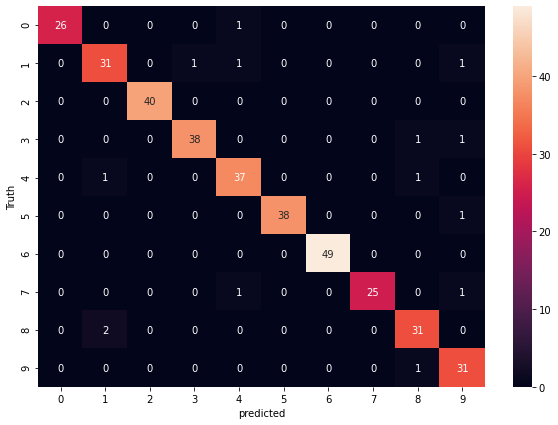

In [41]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [42]:
import pickle

In [43]:
with open('HandWrittenDigits', 'wb') as f:
    pickle.dump(clf, f)

In [44]:
with open('HandWrittenDigits', 'rb') as f:
    HWD = pickle.load(f)

In [46]:
HWD.predict(df.data[[23]])

array([3])